# 01. 모델 평가방법 및 오버피팅
> 머신러닝 모델을 평가하는 방법과 오버피팅에 대해 알아봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 5]
- permalink: /evaluation_and_overfitting
- exec: colab

<br><br>

### 1. 모델 평가방법과 오버피팅이란?
![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/bao_0.png?raw=true)

지난 시간까지 우리는 다양한 모델에 대해 학습하였고 모델의 결과물에 대해 Accuracy를 사용하여 평가하였습니다. 하지만 정말 모든 경우에서 Accuracy를 사용하는 것이 정답일까요?<br><br>

이번 시간에는 Accuracy를 비롯한 Precision, Recall, F1 Score등의 모델 평가방법에 대해 알아보고 오버피팅이 무엇인지에 대해 학습하도록 하겠습니다.<br><br>

### 2. Accuracy

Accuracy는 모델이 예측하여 맞은 개수를 전체 개수로 나눈 값입니다. 예를 들어, 양성과 음성이 각각 500명인 질병 환자에 대해 감염 여부를 예측하는 모델을 실행하였을때 아래와 같은 결과가 나왔다고 가정해봅시다.

- 예측 #1

In [9]:
#collapse-hide
import pandas as pd

case1_df = pd.DataFrame(
    columns=['음성(예측)', '양성(예측)'],
    index=['음성(실제)', '양성(실제)'],
    data=[[390, 110],
          [10, 490]]
)

case1_df.head(2)

,음성(예측),양성(예측)
음성(실제),390,110
양성(실제),10,490


실제로는 음성 500명, 양성 500명이지만 모델은 양성 400명, 음성 600명으로 예측하였고, Accuracy는 (390+490)/1000 = 0.88이 됩니다. 잘 평가된 것 같습니다. 하지만 다음과 같은 경우는 어떨까요?
<br><br>

- 예측 #2

In [7]:
#collapse-hide
import pandas as pd

case2_df= pd.DataFrame(
    columns=['음성(예측)', '양성(예측)'],
    index=['음성(실제)', '양성(실제)'],
    data=[[900, 0],
          [100, 0]]
)

case2_df.head(2)

,음성(예측),양성(예측)
음성(실제),900,0
양성(실제),100,0


동일하게 1000명을 대상으로 예측을 진행했지만, 이번에는 실제 양성의 수가 100명, 음성의 수가 900명입니다. 모델의 예측 결과는 1000명 모두 음성으로 판단하였기 때문에 Accuracy는 900/1000 = 0.90이 됩니다. 이 모델은 정말 병을 검출할 수 있는 능력이 있는 것일까요? <br><br>

두번째 모델은 전체 1000명의 환자 중에 실제로 100명은 양성반응을 보이는데, 단 한명도 잡아내지 못했지만 정확도는 0.9를 기록했습니다. 심지어 두 번째 예측이 첫 번째 예측보다 0.02 높은 Accuracy를 기록했으므로 Accuracy에 기반하여 판단한다면 두 번째 모델이 더 좋은 모델이라고 판단할 수 있겠습니다. <br><br>

하지만, 두 번째 예측은 양성을 단 한명도 예측해내지 못했습니다. 양성을 단 한명도 예측하지 못하는 모델이 Accuracy가 높다는 것만을 이유로 더 좋다고 판단하는 것이 옳은 선택일까요? 이처럼 **불균형한(Imbalanced) 데이터에서는 Accuracy를 사용할 경우 잘못된 성능 예측 결과를 가져올 수 있음**을 꼭 기억해야 합니다. 따라서 분류문제의 경우 Accuracy의 문제를 해결하기 위해 Precision, Recall과 이를 이용한 F1 Score 등을 주로 사용하는 편입니다. 이에 대해 알아봅시다. <br><br>

### 3. Precision

Precision은 모델이 True라고 분류한 항목에서 실제 True인 것의 비율로, **모델의 예측 관점**에서 보는 평가 방법입니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/precision.png?raw=true)

두 번째 모델을 이용하여 Precision을 계산해보도록 하겠습니다. 모델이 양성이라고 분류한 항목의 합은 0입니다. 그러므로 Precision(양성)=0입니다. 모델이 음성이라고 분류한 항목의 합은 1000이고, 실제 음성은 900입니다. 그러므로 Precision(음성)=900/(900+100) = 0.90입니다. 즉, **양성이라고 예측한 것은 0%이고, 음성이라고 예측한 것은 90%로 맞았다고 이해하시면 그 것이 Precision의 개념**입니다.<br><br>

이제 두 Presicion의 평균을 구하면 두 번째 모델의 Presicion을 알아낼 수 있습니다. 모든 항목의 Presicion을 더하고 항목의 개수만큼 나눠주면 됩니다. 두 번째 모델의 Precision은 (0 + 0.9) / 2 = 0.45입니다. 실제로 이 모델의 성능은 이정도로 형편없다고 봐야합니다.<br><br>

### 4. Recall

Recall은 실제 True인 항목에서 모델이 True라고 예측한 것의 비율로, **데이터 관점**에서 보는 평가 방법입니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/recall.png?raw=true)

마찬가지로 두 번째 모델을 이용하여 Recall을 계산해 보겠습니다. 실제 양성인 항목에서 모델이 양성으로 예측한 값은 0, 음성으로 예측한 값은 100 입니다. 그러므로 Recall(양성) = 0/100 = 0입니다. 실제 음성인 항목에서 모델이 음성으로 예측한 값은 900, 양성으로 예측한 값은 0 입니다. 그러므로 Recall(Neg) = 900/900 = 1입니다. 즉, **실제로 음성인 데이터는 다 맞췄지만, 실제로 양성인 데이터는 하나도 못 맞춘 것이라고 생각하시면 그 것이 Recall의 개념**입니다. <br><br>

두 Recall의 평균을 구하면 두 번째 모델의 Recall을 알아낼 수 있습니다. Presicion과 마찬가지로 모든 Recall을 더하고 항목의 개수로 나눠주면 됩니다. 두 번째 모델의 Recall은 (0 + 1) / 2 = 0.5입니다.<br><br>

### 5. F1 Score

앞서 구한 Presicion과 Recall을 이용하여 F1 Score를 계산할 수 있습니다. F1 Score를 구하는 식은 다음과 같습니다. 

<br>
$$2 \times \frac{Presicion \times Recall}{Presicion + Recall}$$
<br>

이를 이용하여 두 번째 모델의 F1 Score를 계산하면 2 * (0.45 * 0.5) / (0.45 + 0.5) = 0.473입니다. 이로써 두 번째 모델의 제대로 된 평가가 끝났습니다. Accuracy는 0.90이 나왔지만, F1 Score는 0.473이 나왔습니다. 이 모델의 Accuracy만 믿고 사용했다면 부정확한 예측를 대량으로 만들어버리는 좋지 못한 결과를 초래하였을 겁니다. 이를 방지하기 위해서는 Accuracy 이외에도 Precision, Recall, F1 Score를 이용한 평가를 진행하여 모델의 성능을 정확하게 알아내야 합니다. <br><br>

### 6. sklearn에서 사용하는 방법

저는 이미 이전 코드들에서 이러한 평가 기법을 사용해왔지만 제가 여러분에게 설명드리지 않았습니다. 정확도의 경우에는 `from sklearn.metrics import accuracy_score`로 계산할 수 있고, 나머지 요소의 경우 `from sklearn.metrics import XXXX_score`와 같이 import 할 수 있습니다.

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
predict = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0]

print('accuracy : ', accuracy_score(label, predict))
print('precision : ', precision_score(label, predict, average='macro'))
print('recall : ', recall_score(label, predict, average='macro'))
print('f1_score : ', f1_score(label, predict, average='macro'))

accuracy :  0.7368421052631579
precision :  0.7444444444444445
recall :  0.5833333333333334
f1_score :  0.6153846153846153


이렇게 평가하면 평가하는 코드가 너무 길어지게 됩니다. 따라서 저는 이를 아주 간단하게 표현하는 `from sklearn.metrics import classification_report`를 자주 사용합니다.

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
predict = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0]

print(classification_report(label, predict))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       0.50      0.25      0.33         4
           2       1.00      0.50      0.67         4

    accuracy                           0.74        19
   macro avg       0.74      0.58      0.62        19
weighted avg       0.74      0.74      0.70        19



위를 보시면 accuracy, macro avg, weighted avg가 있는데, accuracy는 정확도이고, macro avg는 제가 위에서 설명한 방식대로 계산한 precision, recall, f1_score이고, weighted avg는 각 데이터의 숫자만큼 가중 시킨 값인데, **실제로는 macro avg로 평가하는 것이 가장 바람직합니다.** <br><br>

weighted avg의 경우 imbalanced 데이터를 사용할 때에도 가중치를 곱해버려서 틀린 클래스의 imbalanced 했다면 거의 반영이 안됩니다. 가령 이전 예시처럼 1000명의 환자중 900명을 맞추고 100명이 틀렸다면 맞춘 900명에 가중치를 0.9를 주고, 틀린 100명에 가중치를 0.1을 주는데, 이렇게 하면 accuracy와 별반 다를게 없어집니다.

<br>

### 7. Confusion Matrix (혼잡 행렬)

혼잡행렬이라는 평가 기법도 있습니다. 이 것은 어떠한 정량적인 메트릭은 아니고, 정성적으로 눈으로 보면서 평가 할 수 있게 도와줍니다. 각 클래스별로 얼마나 맞췄는지에 대한 것으로 sklearn에서는 `from sklearn.metrics import confusion_matrix`를 이용하면 사용할 수 있습니다.

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
predict = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0]

print(confusion_matrix(label, predict))

[[11  0  0]
 [ 3  1  0]
 [ 1  1  2]]


- 0번 클래스의 경우 11개중 11개를 0으로, 0개를 1로, 0개를 2로 예측하였습니다. 
- 1번 클래스의 경우 4개중 3개를 0으로, 1개를 1로, 0개를 2로 예측하였습니다.
- 2번 클래스의 경우 1개를 0으로, 1개를 1로, 2개를 2로 예측하였습니다.

이를 matplotlib이나 seaborn 등으로 시각화하면 아래처럼 예쁘게 시각화 할 수 있습니다.

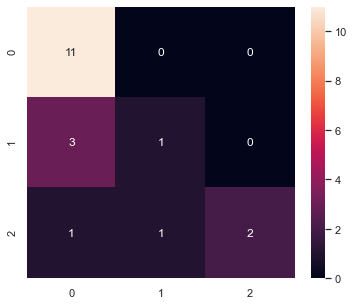

In [124]:
import seaborn as sns 

label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
predict = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0]
cmatrix = confusion_matrix(label, predict)

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(data=cmatrix, annot=True)

In [129]:
import numpy as np
from matplotlib import pyplot 
import itertools

def draw_plt_matrix(cm: np.ndarray):
        """
        metrics에서 출력된 confusion matrix을 시각화해서 그리고 저장합니다.

        :param cm: confusion matrix 객체
        """
        
        label_length = len(cm[0])

        cmap = plt.get_cmap('Blues')
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        plt.figure(figsize=(6, 5))
        im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
        
        tick_marks = np.arange(label_length)
        plt.xticks(tick_marks)
        plt.yticks(tick_marks)
        
        plt.colorbar(im, fraction=0.046, pad=0.04)
        thresh = cm.max() / 1.5

        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.grid(False)
        plt.show()
        plt.close()

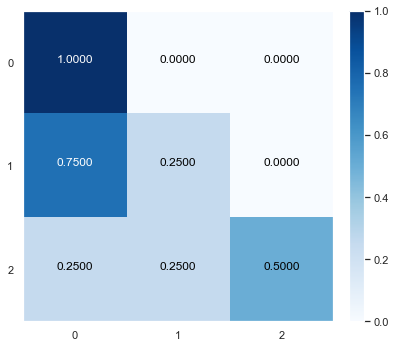

In [130]:
label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
predict = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0]
cmatrix = confusion_matrix(label, predict)

draw_plt_matrix(cm=cmatrix)

<br>

### 7. Overfitting (과적합)

Overfitting은 공통적인 특징을 학습하는 것에 그치지 않고, 각각 샘플들의 자세한 특징까지 학습하여 나타나는 현상입니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/bao_1.PNG?raw=true)<br>

예를 들어, 지폐를 구분하는 모델을 만들고 학습 데이터로 원화, 달러, 엔화를 사용하여 학습을 시켜봅시다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/bao_2.PNG?raw=true)<br>

모델은 직사각형 사이즈에, 금액이 적혀있고, 일련번호가 적힌 것들을 지폐라고 분류할 수 있게 되었습니다. 이제 어느정도 지폐를 잘 분류하는 모델이 되었습니다. 그러나 여기에서 더 욕심을 부려서 학습을 시키게 되면 새로운 특징으로 "사람의 얼굴이 있다"는 것 까지 배우게 됩니다. 더 자세한 특징을 학습시켰으니 모델이 더 정확한 판단을 내릴수 있을 것 같지만, 아래와 같이 결과는 더 나빠집니다. 사람의 얼굴이 없는 지폐는 지폐가 아니라고 판단해버리게 되었습니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day5/bao_3.png?raw=true)

이처럼, 학습데이터의 너무 자세한 특징까지 학습하게 되어 새로운 데이터에 대해 잘 예측하지 못하는 현상을 overfitting이라고 합니다. 실제 데이터에서 우리가 회귀나 분류 등을 수행할 때는 아래처럼 선을 긋는다고 하였습니다.

![](https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/Jr9/image/SbI5NgVY5ZLzvG6QCT8hUcC00lA.jpg)

위의 3장의 이미지를 봅시다. 가장 왼쪽 그림은 underfitting(너무 학습이 덜 된 경우)를 의미합니다. 가운데 그림은 적당하게 잘 학습된 모델입니다. 그리고 가장 오른쪽 그림이 오늘 배운 overfitting(학습이 너무 과하게 된 경우)입니다. 보편적인 특징이 아니라 각각 샘플 자체를 암기해버려서, 그 샘플과 완벽하게 똑같지 않다면 틀려버리게 되는 경우입니다. 이러한 overfitting 문제는 꽤나 자주 일어나며 이를 해결하는 것이 머신러닝과 딥러닝의 영원한 숙제라고 할 수 있습니다. <br><br>

overfitting문제를 완벽하게 해결하지는 못해도 어느정도 완화할 수는 있는데, 가장 기본적인 방법은 학습 데이터를 충분히 많이 사용하여 다양한 테스트 데이터에도 예측할 수 있도록 하는 것이며, 이외에도 Regularization과 Dropout등의 방법을 통해 해결할 수 있습니다. 
<br><br>
